In [79]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split


In [82]:
ht=pd.read_csv('NewCleveland.csv')
ht.head()

,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [83]:
ht.columns

Index(['63', '1', '1.1', '145', '233', '1.2', '2', '150', '0', '2.3', '3',
       '0.1', '6', '0.2'],
      dtype='object')

In [84]:
ht.shape

(302, 14)

In [126]:
ht.rename(columns={'63':'Age','1':'Sex','1.1':'ChestPain','145':'trestbps','233':'cholestrol','1.2':'FatingBloodSugar','2':'RestingECG','150':'MaximumHeartRate','0':'ExerciseInducedAngina','2.3':'OldPeak','3':'Slope','0.1':'CA','6':'thal','0.2':'Target'}, inplace=True)

In [127]:
ht.head()

,Age,Sex,ChestPain,trestbps,cholestrol,ExerciseInducedAngina,RestingECG,MaximumHeartRate,ExerciseInducedAngina,OldPeak,Slope,CA,thal,Target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [125]:
ht.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    302 non-null    int64  
 1   Sex                    302 non-null    int64  
 2   ChestPain              302 non-null    int64  
 3   trestbps               302 non-null    int64  
 4   cholestrol             302 non-null    int64  
 5   ExerciseInducedAngina  302 non-null    int64  
 6   RestingECG             302 non-null    int64  
 7   MaximumHeartRate       302 non-null    int64  
 8   ExerciseInducedAngina  302 non-null    int64  
 9   OldPeak                302 non-null    float64
 10  Slope                  302 non-null    int64  
 11  CA                     302 non-null    float64
 12  thal                   302 non-null    float64
 13  Target                 302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [88]:
ht.isnull().sum()

Age                      0
Sex                      0
ChestPain                0
trestbps                 0
cholestrol               0
ExerciseInducedAngina    0
RestingECG               0
MaximumHeartRate         0
ExerciseInducedAngina    0
OldPeak                  0
Slope                    0
CA                       4
thal                     2
Target                   0
dtype: int64

<AxesSubplot:>

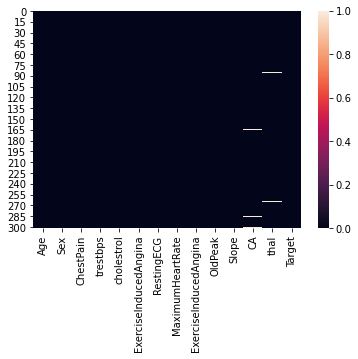

In [89]:
sns.heatmap(ht.isnull())

In [90]:
ht['CA'].value_counts()

0.0    175
1.0     65
2.0     38
3.0     20
Name: CA, dtype: int64

In [91]:

ht['thal'].value_counts()

3.0    166
7.0    117
6.0     17
Name: thal, dtype: int64

In [105]:
ht_mean_CA=ht['CA'].mean()

In [106]:
ht_mean_CA

0.674496644295302

In [107]:
#ht['CA'].fillna(ht_mean_CA,inplace=True)

In [111]:
ht['CA'] = ht['CA'].fillna(ht_mean_CA)

In [108]:
ht_mean_thal=ht['thal'].mean()

In [109]:
ht_mean_thal

4.73

In [113]:
ht['thal'] = ht['thal'].fillna(ht_mean_thal)

In [114]:
ht.isnull().sum()

Age                      0
Sex                      0
ChestPain                0
trestbps                 0
cholestrol               0
ExerciseInducedAngina    0
RestingECG               0
MaximumHeartRate         0
ExerciseInducedAngina    0
OldPeak                  0
Slope                    0
CA                       0
thal                     0
Target                   0
dtype: int64

In [115]:
ht.describe()

,Age,Sex,ChestPain,trestbps,cholestrol,ExerciseInducedAngina,RestingECG,MaximumHeartRate,ExerciseInducedAngina,OldPeak,Slope,CA,thal,Target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.931947,1.935102,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [116]:
ht.skew()

Age                     -0.203026
Sex                     -0.769709
ChestPain               -0.845849
trestbps                 0.713008
cholestrol               1.131463
ExerciseInducedAngina    2.018566
RestingECG               0.026623
MaximumHeartRate        -0.536399
ExerciseInducedAngina    0.737281
OldPeak                  1.281701
Slope                    0.503687
CA                       1.192300
thal                     0.251022
Target                   1.053696
dtype: float64

In [117]:
a=np.log1p(ht['ExerciseInducedAngina'])
a.skew()

ExerciseInducedAngina    2.018566
ExerciseInducedAngina    0.737281
dtype: float64